In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 17 00:42:53 2018

@author: chintandoshi
"""

import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

D = [[0,206,429,1504,963,2976,3095,2979,1949],
[206,0,233,1308,802,2815,2934,2786,1771],
[429,233,0,1075,671,2684,2799,2631,1616],
[1504,1308,1075,0,1329,3273,3053,2687,2037],
[963,802,671,1329,0,2013,2142,2054,996],
[2976,2815,2684,3273,2013,0,808,1131,1307],
[3095,2934,2799,3053,2142,808,0,379,1235],
[2979,2786,2631,2687,2054,1131,379,0,1059],
[1949,1771,1616,2037,996,1307,1235,1059,0]]
D = np.array(D)
names = ['BOS','NYC','DC','MIA','CHI','SEA','SF','LA','DEN']
x = np.zeros((9,2))

In [2]:
def grad(i):
    global D,x
    loop = range(9)
    loop.pop(i)
    lis = [(1 - (D[i][j]/la.norm(x[i]-x[j])))*(x[i]-x[j]) for j in loop]
    return 4 * sum(lis)

def func():
    global x
    total = 0.0
    for i in range(9):
        for j in range(9):
            total += ((la.norm(x[i] - x[j]) - D[i][j])**2)
    return total
    
# learning rate = alpha
# convergence criteria = ep
 
def gradient_descent(alpha = 0.001, ep=0.000001, max_iter=1000000):
    global x
    converged = False
    iter = 0
    x = np.random.rand(9,2)
    J = func()

    while not converged:
        gradlist = [grad(i) for i in range(9)]
        tempx = [x[i] - alpha * gradlist[i] for i in range(9)]
        x = np.array(tempx)
        e = func()
        if abs(J-e) <= ep:
            print J
            print e
            print 'Converged, iterations: ', iter, '!!!'
            converged = True
        J = e   
        iter += 1
        if iter == max_iter:
            print 'Max interactions exceeded!'
            converged = True

    return x

def plot():
    global x,names
    xval = x.T[0]
    yval = x.T[1]
    fig, ax = plt.subplots()
    ax.scatter(xval, yval)
    for i, txt in enumerate(names):
        ax.annotate(txt, (xval[i],yval[i]))
    plt.show()

In [12]:
gradient_descent()

908466.6760614113
908466.6760604157
Converged, iterations:  5125 !!!


array([[  916.46100205, -1093.91918361],
       [  719.37207664, -1014.35457328],
       [  483.83298885,  -976.16328994],
       [ -450.58881669, -1502.65373231],
       [  198.38827804,  -392.50060858],
       [-1123.49510271,  1276.2328405 ],
       [ -475.64225999,  1650.71416591],
       [ -143.4246764 ,  1544.28702671],
       [ -121.45400365,   511.90444183]])

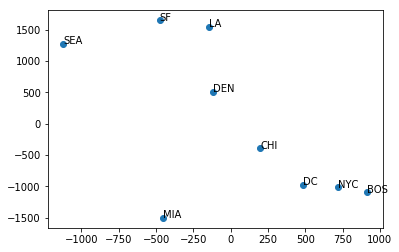

In [13]:
plot()